## Missing Values
Missing values in a dataset occur when information for one or more variables is not available

#### __Three types of missing values__

### _1.  MCAR (Missing Completely At Random)_
In MCAR dataset, data points are missing randomly with no pattern or any particular reason,  
- No systematic pattern in the missingness.  
- The probability of missing data is the same for all observations. And is unrelated to any variable in dataset 

ex : During data entry, some values are accidentally left blank or lost due to technical glitch. 

### _2. MAR (Missing At Random)_
In MAR dataset, missing data points do not depend on missing data, rather they depend on observed data.
- Missingness depends on other variables (variable that contain observed data) in the dataset.
- The missing data can be predicted using observed data.

ex : In an internet survey, respondents from rural areas (observed variable) are more likely to skip questions about internet usage (missing variable). The missingness is related to location, not to internet usage itself.

### _3. MNAR (Missing Not At Random)_
In MNAR dataset, the missing data points depends on missing data itself or some other unobserved factor
- The reason for missing data is linked to the value itself.
- Ignoring it can lead to incorrect conclusions.

ex : In an income survey, people with very high salaries might skip answering income-related questions because they feel uncomfortable revealing their earnings. The missingness depends on income itself (the unobserved or missing variable).


#### Example 
In an salary survey
| **Scenario** | **Explanation**                                 | **Reason for Missingness**                      |
|--------------|--------------------------------------------------|-------------------------------------------------|
| **MCAR**     | Some data is lost due to technical error         | Completely random, no pattern                   |
| **MAR**      | Older people are less likely to report income    | Depends on age (observed variable), not income  |
| **MNAR**     | High-income individuals avoid reporting income   | Missingness depends on income itself (unobserved) |


In [23]:

'''LETS GET STARTED'''


'LETS GET STARTED'

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np

In [25]:
data = sns.load_dataset('titanic')     # Seaborn has many datasets for us to use

print(type(data))                      # sns.load_dataset return a dataframe
print(data.shape)                      # Shape of df
data.head()

<class 'pandas.core.frame.DataFrame'>
(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
data.isnull().head()    # isnull() marks "nan" values as True

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [28]:
data.isnull().sum(axis=0)
# sum() to a DataFrame or Series,adds up all the 1s(i.e., True values) in that axis.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### __Method 1__

In [33]:
''' DROP ROWS/COLUMNS''' 
# The problem is that, we lost a huge amount of data, so use carefully

' DROP ROWS/COLUMNS'

In [34]:
data.dropna(axis=0).head()     # Drop rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [37]:
data.dropna(axis=1).head()    # Drop columns

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [39]:
print(f'Original shape: {data.shape}')
print(f'After dropping rows with missing vals: {data.dropna(axis=0).shape}')
print(f'After dropping columns with missing data: {data.dropna(axis=1).shape}')

'''To have permanent change in original data use "data.dropna(inplace=True)"'''

Original shape: (891, 15)
After dropping rows with missing vals: (182, 15)
After dropping columns with missing data: (891, 11)


'To have permanent change in original data use "data.dropna(inplace=True)"'

In [47]:
type(print(data['age'].mean()))

29.69911764705882


NoneType

### ___Imputation Techniques___  
To fill or replace the missing values

#### 1. Mean imputation

1️⃣ Data is Normally Distributed  
No significant skew or outliers.  
The mean accurately represents the central value.  

2️⃣ Continuous Numeric Data  
Suitable for variables like age, temperature, or height.  

3️⃣ Missing Values are MCAR or MAR  
Works well if the missingness is random or can be explained by other observed data.

<Axes: xlabel='age', ylabel='Count'>

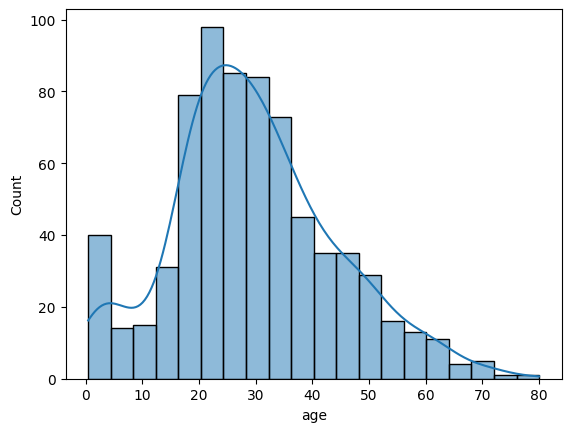

In [ ]:
sns.histplot(data['age'],kde=True)    # See that this is approx a normal distribution (central tendancy is towards mean)

In [58]:
# Create a new column which is a copy of 'age' and contain mean if null value
data['age_mean']=data['age'].fillna(data['age'].mean())    
data[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


#### 2. Median Imputation

1️⃣ Data is Skewed (Left or Right Skewed)  
The median is less affected by outliers compared to the mean.  
Example: Income, house prices, or customer spending.  

2️⃣ Continuous Numeric Data with Outliers  
Median better represents the central tendency in the presence of extreme values.  

3️⃣ Missing Values are MCAR or MAR  
Works well if missingness is random or depends on other observed variables.

In [63]:
data['age_median'] = data['age'].fillna(data['age'].median())
data[['age','age_mean','age_median']].loc[888]

age                 NaN
age_mean      29.699118
age_median    28.000000
Name: 888, dtype: float64

#### 3. Mode Imputation

In [67]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [68]:
data['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [69]:
data[data['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


<Axes: xlabel='embark_town', ylabel='Count'>

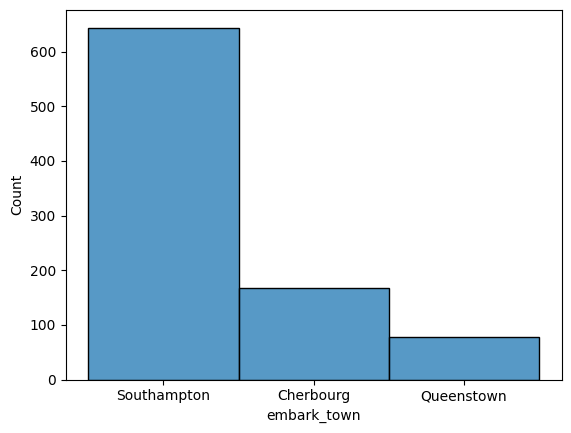

In [72]:
sns.histplot(data['embark_town'])    

'''Hence the frequency of Southampton is max'''

In [79]:
print(data['embark_town'].mode())
# Hence the mode is 'Southampton'

print(data['embark_town'].mode()[0])

0    Southampton
Name: embark_town, dtype: object
Southampton


In [80]:
data['embark_town_mode'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [81]:
data[['embark_town','embark_town_mode']]

,embark_town,embark_town_mode
0,Southampton,Southampton
1,Cherbourg,Cherbourg
2,Southampton,Southampton
3,Southampton,Southampton
4,Southampton,Southampton
...,...,...
886,Southampton,Southampton
887,Southampton,Southampton
888,Southampton,Southampton
889,Cherbourg,Cherbourg


In [82]:
print(data['embark_town_mode'].isnull().sum())
print(data['embark_town'].isnull().sum())

0
2


#### 4. Random Sampling
randomly selecting a value from the available (non-missing) data. This method can be useful when you don't want to introduce bias by choosing a fixed value like the mean, median, or mode.

In [92]:
data['embarked_random'] = data['embarked'].fillna(np.random.choice(data['embarked'].dropna()))

In [93]:
print(data['embarked_random'].isnull().sum())
print(data['embarked'].isnull().sum())

0
2
